### Principal Component Analysis (PCA)

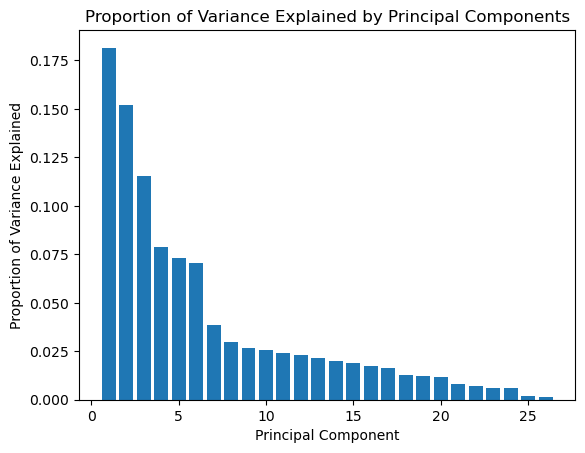

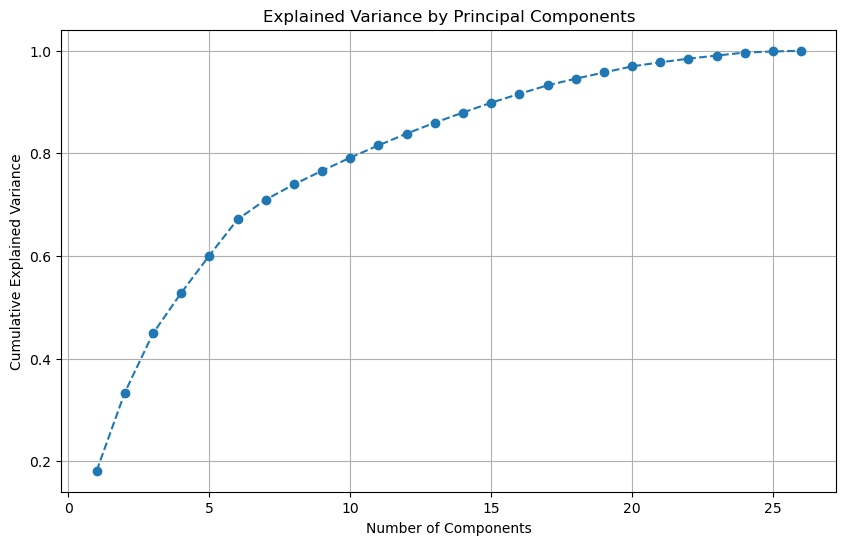

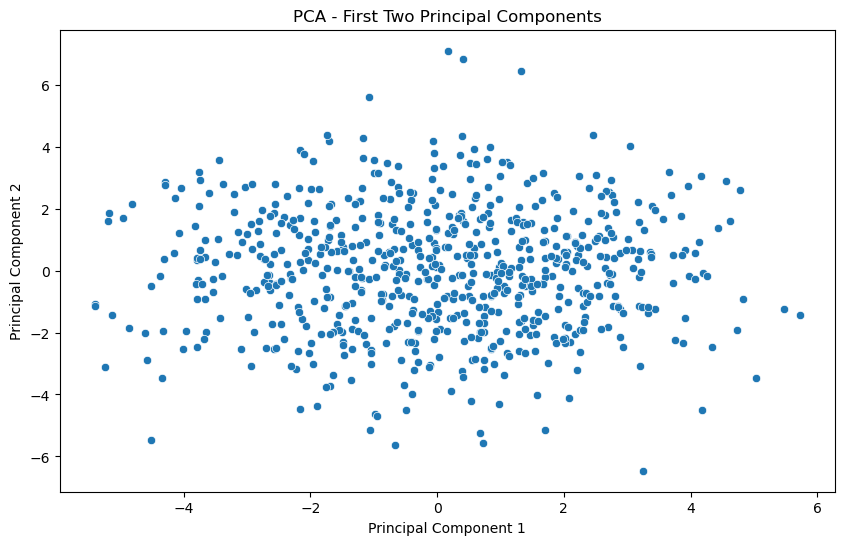

Loadings of each variable on the principal components:
           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
Case  0.041494 -0.062640 -0.049585  0.050806 -0.090342  0.061767  0.936855   
Q1   -0.122857 -0.111569  0.281940  0.288193  0.251804  0.249205  0.023931   
Q2   -0.310771  0.046068 -0.165164  0.037812  0.058127 -0.042013 -0.030865   
Q3   -0.349201  0.044141  0.310310 -0.113948  0.020813 -0.078489  0.056460   
Q4   -0.057290 -0.441527 -0.091413 -0.017692 -0.092167  0.221967 -0.052578   
Q5   -0.265801 -0.081130 -0.015025 -0.224905 -0.190766 -0.076767 -0.066171   
Q6   -0.048398 -0.234340  0.105028 -0.130197  0.375220 -0.176100  0.006254   
Q7    0.088783 -0.035839 -0.170019 -0.419774  0.281827  0.138153  0.024778   
Q8   -0.049387  0.419347  0.026580  0.049518  0.111209 -0.089159  0.097859   
Q9   -0.357596 -0.036322 -0.090650  0.294949 -0.013471  0.073545  0.015224   
Q10  -0.018475 -0.376963  0.115385  0.239307 -0.043800  0.177207 -0.020887   
Q11  -0.2

In [2]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the data
file_path = 'MMA867 Group Discussion - PCA Data.xlsx'  # Replace with the path to your file
data = pd.read_excel(file_path)

# Step 3: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 4: Perform PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Step 5: Analyze the explained variance to determine the number of components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Bar plot of explained variance
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Proportion of Variance Explained by Principal Components')
plt.show()

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

# Step 6: Analyze the loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=data.columns)

# Step 7: Identifying Outliers (Employees with unusual responses)
# We'll use the first two principal components to visualize the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First Two Principal Components')
plt.show()

# Step 8: Detailed Loadings Analysis
print("Loadings of each variable on the principal components:")
print(loadings)

# Step 9: Further analysis (optional)
# This can involve clustering, identifying reverse-coded questions, or more in-depth interpretation of components

# Saving the PCA results (Optional)
pca_results = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
pca_results.to_excel('PCA_Results.xlsx', index=False)

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D scatter plots

# Load Boston data
boston_df= pd.read_excel('MMA867 Group Discussion - PCA Data.xlsx')
boston_df['target'] = boston_df['medv']
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [2]:
# Because PCA works best with continuous data, we will exclude the categorical dummy variable "chas" (4th column), we also exclude the "price" in this example
# Remove 'CHAS' column and split predictors and response
boston_predictors = boston_df.drop(['chas', 'medv', 'target'], axis=1)
boston_response = boston_df['medv']

# Standardize predictors
scaler = StandardScaler() #This is to re-scale it
boston_scaled = scaler.fit_transform(boston_predictors)

# Perform PCA
pca = PCA()
boston_pca = pca.fit_transform(boston_scaled)

In [3]:
# Print a summary of PCA results
# Compare the number of PC's and the number of variables
# Examine the proportion of variance
# PC1 explains __% of the total variance, which means that __% of the information in the dataset (11 variables) can be encapsulated by just that one Principal Component.
# The first 3 PC's explains __% of the variance.

# Variance explained by each component
explained_variance_ratio = pca.explained_variance_ratio_
print("Proportion of Variance:", explained_variance_ratio)

Proportion of Variance: [0.53698217 0.11615512 0.10457791 0.07319621 0.0489877  0.03604008
 0.02528859 0.02047857 0.01694256 0.01547389 0.0058772 ]


In [6]:
# Calculate the cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
print("Cumulative Explained Variance:", cumulative_explained_variance)

Cumulative Explained Variance: [0.53698217 0.65313729 0.7577152  0.83091142 0.87989912 0.9159392
 0.94122778 0.96170635 0.97864891 0.9941228  1.        ]


In [7]:
# Print the number of PC's and the proportion of variance explained
num_pcs = len(explained_variance_ratio)
print("Number of Principal Components:", num_pcs)
print(f"PC1 explains {explained_variance_ratio[0]*100:.2f}% of the total variance.")
print(f"The first 3 PC's explain {cumulative_explained_variance[2]*100:.2f}% of the variance.")

Number of Principal Components: 11
PC1 explains 53.70% of the total variance.
The first 3 PC's explain 75.77% of the variance.


In [8]:
# Check the names of the components
component_names = [f"PC{i+1}" for i in range(num_pcs)]
print("Names of the Principal Components:", component_names)

# Check the loadings (weights) of all Principal Components
principal_component_loadings = pca.components_
print("Loadings of all Principal Components:")
print(pd.DataFrame(principal_component_loadings, columns=boston_predictors.columns, index=component_names))

Names of the Principal Components: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11']
Loadings of all Principal Components:
          crim        zn     indus       nox        rm       age       dis  \
PC1   0.251408 -0.266331  0.354810  0.349834 -0.196607  0.323064 -0.330748   
PC2   0.392323  0.389526 -0.091979 -0.216002 -0.116716 -0.336867  0.371443   
PC3   0.218530  0.215472  0.018687  0.185735  0.693483  0.074402 -0.162005   
PC4   0.196739  0.436424  0.016843  0.193566 -0.362549  0.039249  0.078891   
PC5   0.757191 -0.297573 -0.349041 -0.200182  0.086267  0.121401 -0.111731   
PC6   0.161104 -0.401247  0.173708  0.077125 -0.330992 -0.600767 -0.119764   
PC7   0.273774  0.375350  0.632243 -0.015555  0.025644 -0.042620 -0.159458   
PC8   0.028702  0.257836 -0.374419  0.201804 -0.441753  0.392984 -0.162004   
PC9  -0.109975  0.268700 -0.313305  0.136974  0.045269 -0.453958 -0.693081   
PC10  0.085096 -0.068040 -0.116300  0.806819  0.134819 -0.189172  0

In [9]:
# Check the transformed data (loadings of all samples)
transformed_data = pca.transform(boston_scaled)
print("Loadings of all samples:")
print(pd.DataFrame(transformed_data, columns=component_names))

Loadings of all samples:
          PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -2.047628 -1.006637  0.621204  0.535383  0.359972  0.282825 -0.400165   
1   -1.385450 -0.859015 -0.468607 -0.326885  0.600441 -0.228881 -0.162580   
2   -2.029891 -0.805042  0.465356 -1.014699  0.552107  0.095633  0.050185   
3   -2.575656 -0.168471  0.027882 -1.271395  0.679689  0.251431 -0.357614   
4   -2.414135 -0.277129  0.092432 -1.210278  0.768079 -0.140018 -0.437573   
..        ...       ...       ...       ...       ...       ...       ...   
501 -0.226198 -0.933548 -0.503282 -1.284804  0.247353 -0.255834  0.869863   
502 -0.002951 -0.984195 -0.910089 -1.068437  0.223101 -0.149441  0.873224   
503 -0.211219 -1.340003  0.135393 -1.675411  0.353761 -0.646476  0.998694   
504 -0.176010 -1.242757 -0.101916 -1.530244  0.327346 -0.586080  0.953442   
505 -0.017835 -0.987408 -0.951726 -1.071042  0.203022 -0.135427  0.884378   

          PC8       PC9      PC10      PC11  
0   

In [12]:
# Calculate the variance of each principal component
variance_of_components = pca.explained_variance_
print(variance_of_components)

[5.91850056 1.28023642 1.15263494 0.80675274 0.53993179 0.39722586
 0.27872531 0.2257103  0.18673724 0.17054984 0.06477718]


In [13]:
# Calculate the proportion of variance explained by each principal component
variance_explained = variance_of_components / sum(variance_of_components)
print(variance_explained)

[0.53698217 0.11615512 0.10457791 0.07319621 0.0489877  0.03604008
 0.02528859 0.02047857 0.01694256 0.01547389 0.0058772 ]


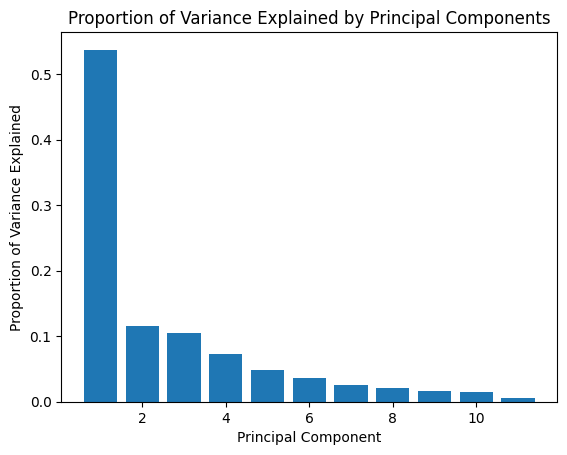

In [14]:
# Bar plot of explained variance
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Proportion of Variance Explained by Principal Components')
plt.show()

'Choosing the number of components is somewhat subjective; there is a clear break after the __th principal component(s), so we can choose the first __ components

'Because the first ___ components have much larger variances than the rest. By doing so, it is believed that the remaining components are somewhat similar and are likely to be statistical noise.

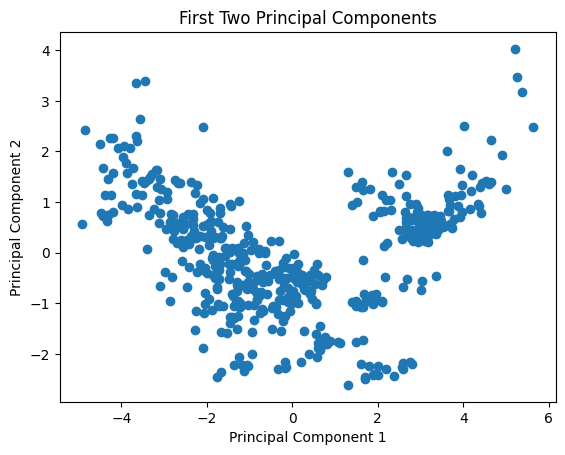

In [15]:
# Plot first two principal components
plt.scatter(boston_pca[:, 0], boston_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('First Two Principal Components')
plt.show()

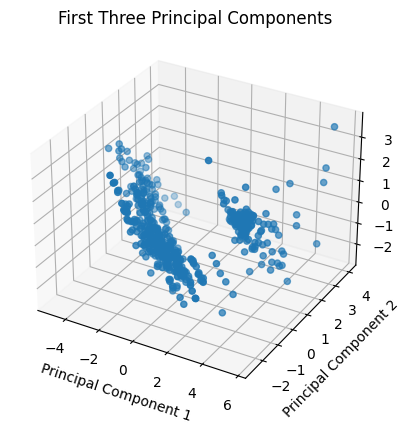

In [16]:
# 3D scatter plot of first three principal components
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(boston_pca[:, 0], boston_pca[:, 1], boston_pca[:, 2])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('First Three Principal Components')
plt.show()

### Principal Component Regression (PCR)


Notice that we did not split the data into training/testing in PCA, because we are not doing any prediction in PCA. PCA is a tool for exploring the historical data

However, we can use the loadings from PCA to predict the response.

R-squared: 0.6885


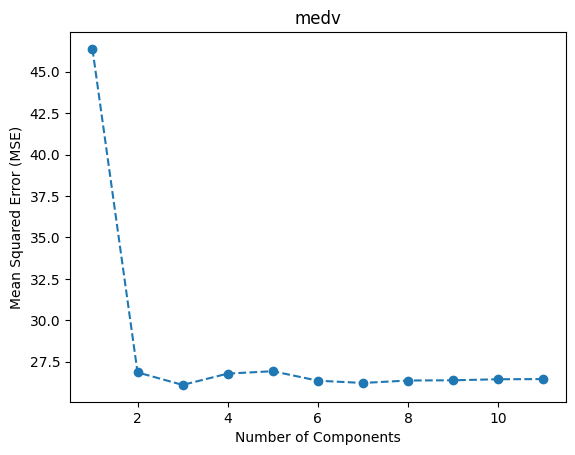

26.450359614052264


In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt

# Load your Boston dataset
boston_df= pd.read_csv('Boston.csv')

# Separate predictors (features) and response (target variable)
X = boston_df.drop(columns=["medv"])
y = boston_df["medv"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=6)

# Perform Partial Least Squares (PLS) regression with cross-validation
pls = PLSRegression(n_components=2, scale=True)
pls.fit(X_train, y_train)

# Print the R-squared value (you can calculate other metrics as needed)
r_squared = pls.score(X_test, y_test)
print(f"R-squared: {r_squared:.4f}")

# Create a validation plot (MSEP vs. number of components)
n_components_range = range(1, 12)
mse_values = []

for n_components in n_components_range:
    pls = PLSRegression(n_components=n_components, scale=True)
    pls.fit(X_train, y_train)
    y_pred = pls.predict(X_test)
    mse = np.mean((y_pred.squeeze() - y_test) ** 2)
    mse_values.append(mse)

plt.plot(n_components_range, mse_values, marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("medv")
plt.show()

print(mse)

Plot the cross-validation MSE

We see that the smallest cross-validation error occurs when all components are used

This amounts to simply performing least squares, because when all of the components are used in PCR no dimension reduction occurs

However, from the plot we also see that the cross-validation error is roughly the same when only __ component is included in the model

This suggests that a model that uses just __ component might suffice

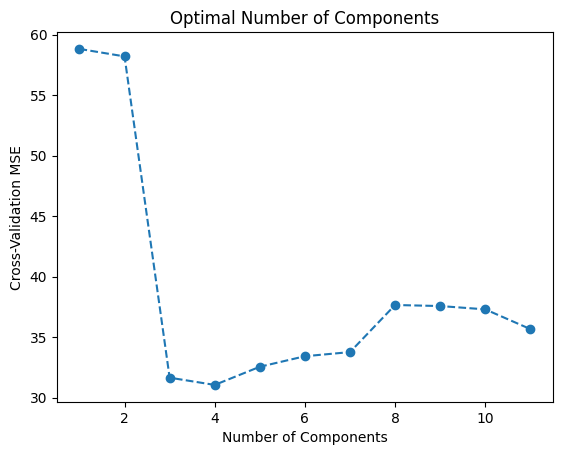

Optimal Number of Components: 4


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Find the optimal number of components using cross-validation
mse_cv = []
components_range = range(1, boston_pca.shape[1] + 1)

for n_components in components_range:
    pcr = LinearRegression()
    mse_cv.append(-1 * cross_val_score(pcr, boston_pca[:, :n_components], boston_response, cv=5, scoring='neg_mean_squared_error').mean())

# Plot the cross-validation errors
plt.plot(components_range, mse_cv, marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cross-Validation MSE")
plt.title("Optimal Number of Components")
plt.show()

# Based on the plot, select the optimal number of components
optimal_components = np.argmin(mse_cv) + 1

# Perform PCR with the optimal number of components
pcr = LinearRegression()
pcr.fit(boston_pca[:, :optimal_components], boston_response)

# Print the summary (coefficients and other statistics are not available as in R's summary.pcr)
print(f"Optimal Number of Components: {optimal_components}")

### Advanced topic: How PCA works

In [19]:
# How PCA works in Python
cov_matrix = np.cov(boston_scaled.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
explained_variance = eigenvalues / np.sum(eigenvalues)

print(eigenvectors)

[[-0.25140813  0.39232273 -0.21853029  0.19673921 -0.75719054  0.16110433
   0.04484538 -0.27377413 -0.08509556  0.10997478 -0.02870202]
 [ 0.26633089  0.38952558 -0.21547244  0.43642448  0.29757305 -0.40124689
  -0.0818432  -0.37534966  0.06803977 -0.26869996 -0.25783606]
 [-0.35480986 -0.09197865 -0.0186866   0.01684279  0.34904068  0.17370793
  -0.24780431 -0.63224273  0.1163001   0.31330461  0.37441935]
 [-0.3498336  -0.21600162 -0.18573451  0.19356646  0.20018198  0.07712535
   0.04782048  0.01555474 -0.80681943 -0.13697423 -0.20180448]
 [ 0.19660662 -0.11671572 -0.69348323 -0.36254907 -0.08626729 -0.33099239
   0.0483253  -0.02564442 -0.13481895 -0.04526885  0.44175339]
 [-0.32306444 -0.33686712 -0.0744017   0.03924869 -0.12140087 -0.60076717
  -0.03603178  0.04262047  0.1891717   0.45395779 -0.39298355]
 [ 0.33074809  0.3714431   0.16200528  0.07889089  0.11173126 -0.11976422
  -0.01893517  0.15945821 -0.40118176  0.69308106  0.16200395]
 [-0.32229905  0.38001604 -0.27855316 -0.

In [ ]:
print(eigenvalues)

[5.91850056 1.28023642 1.15263494 0.80675274 0.53993179 0.39722586
 0.06477718 0.27872531 0.17054984 0.18673724 0.2257103 ]


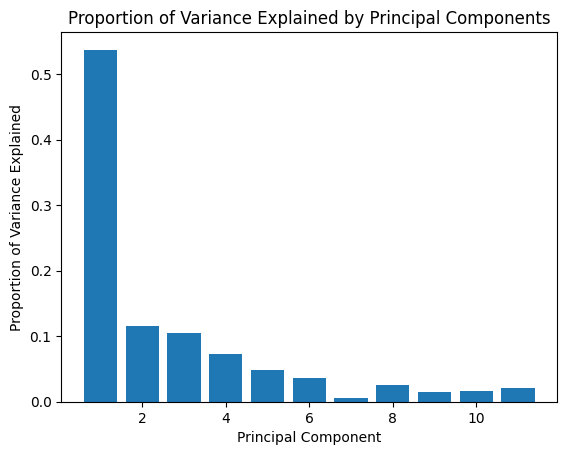

In [20]:
# Compare the results with variance of PCA
# Bar plot of explained variance
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Proportion of Variance Explained by Principal Components')
plt.show()